<a href="https://colab.research.google.com/github/vedasam-ch15/Google-Play-Store-Data-Analysis/blob/main/Topic_Modeling_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **FULL CATEGORY (BUSINESS APPS)**

In [2]:
full_data = pd.read_csv('/content/drive/MyDrive/design credits project/outputfile (1).csv')
full_data.head()

,appname,review-no,content,thumbsUpCount,score
0,ajio,1,This app showing 404 product not found error c...,0,1
1,ajio,2,Good 👍r response reasonable price,0,5
2,ajio,3,Very Good application to purchase appeal and f...,0,5
3,ajio,4,"I am trying to register, the app is asking for...",0,1
4,ajio,5,Isse ghatiya app maine na dekha h.. na hi dekh...,0,1


In [3]:
'''for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
data = pd.read_csv('ajio.csv')
data.head()'''




"for (appname), group in full_data.groupby(['appname']):\n     group.to_csv(f'{appname}.csv', index=False)\n \ndata = pd.read_csv('ajio.csv')\ndata.head()"

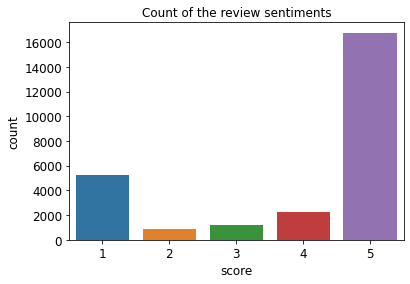

In [4]:
sns.countplot(full_data['score'])
plt.title('Count of the review sentiments')
plt.show()

In [5]:

import gensim

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
 
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

def preprocess(text):
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [6]:
processed_docs = []

for doc in full_data['content']:
    processed_docs.append(preprocess(doc))

In [7]:

dictionary = gensim.corpora.Dictionary(processed_docs)

In [8]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

In [9]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [10]:

seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)

In [11]:
for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.057*"work" + 0.030*"download" + 0.029*"video" + 0.028*"super" + 0.026*"time" + 0.020*"cours" + 0.020*"play" + 0.019*"issu"


Topic: 1 
Words: 0.214*"nice" + 0.128*"best" + 0.077*"busi" + 0.045*"applic" + 0.043*"use" + 0.034*"app" + 0.030*"help" + 0.028*"thank"


Topic: 2 
Words: 0.030*"like" + 0.029*"love" + 0.024*"updat" + 0.019*"option" + 0.016*"featur" + 0.015*"invoic" + 0.013*"need" + 0.012*"version"


Topic: 3 
Words: 0.134*"great" + 0.050*"servic" + 0.024*"store" + 0.018*"work" + 0.017*"support" + 0.017*"product" + 0.016*"avail" + 0.016*"applic"


Topic: 4 
Words: 0.078*"easi" + 0.060*"excel" + 0.044*"game" + 0.033*"experi" + 0.033*"busi" + 0.029*"amaz" + 0.027*"user" + 0.027*"friend"


Topic: 5 
Words: 0.031*"money" + 0.027*"lead" + 0.025*"custom" + 0.024*"product" + 0.018*"awesom" + 0.017*"worst" + 0.017*"order" + 0.016*"time"






*   Topic 1: Not working properly, issues with updates and login
*   Topic 2: Positive reviews (best platform, great app, thanks for the app...)
*   Topic 3: Like the app but issue with updates for better versions 
* Topic 4: Price related issues
* Topic 5: Recommending the app but need improvement
* Topic 6: Time waste because of the fakeness of the app




# **FUNCTION DEFINITIONS**

loading the data of a particular app

In [12]:
def load_app_csv(app):
  for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
  data = pd.read_csv(f'{app}.csv')
  return data


plotting the graph of a particular app

In [13]:

def graph(appname, data):
  sns.countplot(data['score'])
  plt.title('Count of the review sentiments')
  plt.show()

Preprocessing of apps

In [14]:
def preprocess(data):
  import gensim

  stemmer = SnowballStemmer('english')

  def lemmatize_stemming(text):
  
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

  def preprocess(text):
      
      result = []
      for token in gensim.utils.simple_preprocess(text):
          if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
              result.append(lemmatize_stemming(token))
      return result

  processed_docs = []

  for doc in data['content']:
      processed_docs.append(preprocess(doc))
      
  return processed_docs



model training

In [15]:
def lda(appname):
  data = load_app_csv(appname)
  pre = preprocess(data)
  dictionary = gensim.corpora.Dictionary(pre)
  dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)
  bow_corpus = [dictionary.doc2bow(doc) for doc in pre]

  seed = 41
  lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)
  
  for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


In [16]:
appsnamelist = ['whatsapp','phonepe','shoekonnect','paytm','googlepay','drbindra','facebook','mailchimp','norbsoft','amazonpay','indianoil','udemy','digitaldukan','sulekha','segb','earnmoneyonline','indianmart','rcmbusiness','ghoshak','vyapar','anar','shopify','frshbooks','paypay','linkedin','monopoly','skype','jdbusiness','ajio','amazonbusiness']

# **1)WHATSAPP**

In [17]:
lda(appsnamelist[0])

Topic: 0 
Words: 0.400*"love" + 0.145*"like" + 0.056*"app" + 0.048*"status" + 0.048*"happi" + 0.048*"mast" + 0.042*"instal" + 0.039*"slow"


Topic: 1 
Words: 0.127*"easi" + 0.127*"updat" + 0.103*"problem" + 0.102*"thank" + 0.093*"enjoy" + 0.065*"fast" + 0.063*"use" + 0.050*"need"


Topic: 2 
Words: 0.263*"best" + 0.169*"super" + 0.143*"excel" + 0.077*"better" + 0.071*"time" + 0.041*"whatsapp" + 0.040*"ban" + 0.036*"number"


Topic: 3 
Words: 0.279*"whatsapp" + 0.233*"busi" + 0.044*"experi" + 0.044*"option" + 0.033*"tri" + 0.030*"download" + 0.030*"time" + 0.028*"want"


Topic: 4 
Words: 0.632*"nice" + 0.092*"awesom" + 0.064*"work" + 0.057*"applic" + 0.036*"interest" + 0.028*"help" + 0.022*"exlent" + 0.010*"fast"


Topic: 5 
Words: 0.294*"great" + 0.118*"amaz" + 0.093*"chat" + 0.085*"open" + 0.068*"kumar" + 0.066*"cool" + 0.045*"download" + 0.043*"start"




# TOPICS

* Topic 1: Love the app but installing slowly (technical)
* Topic 2: Easy to use but update problem (technical)
* Topic 3: Best app (good reviews) (non technical)
* Topic 4: Time taking for download (technical, Topic 1)
* Topic 5: Help related issues (non technical)
* Topic 6: Great app but problem opening a chat (technical)

# **2)PHONEPE**

In [18]:
lda(appsnamelist[1])

Topic: 0 
Words: 0.619*"super" + 0.096*"easi" + 0.069*"fine" + 0.069*"ravi" + 0.056*"great" + 0.016*"problem" + 0.016*"option" + 0.008*"like"


Topic: 1 
Words: 0.353*"best" + 0.214*"busi" + 0.070*"account" + 0.067*"phonep" + 0.060*"mast" + 0.050*"bank" + 0.050*"experi" + 0.040*"thank"


Topic: 2 
Words: 0.272*"better" + 0.247*"use" + 0.247*"help" + 0.125*"busi" + 0.005*"super" + 0.005*"excel" + 0.004*"like" + 0.004*"phone"


Topic: 3 
Words: 0.356*"servic" + 0.139*"custom" + 0.125*"payment" + 0.089*"receiv" + 0.089*"applic" + 0.051*"problem" + 0.039*"person" + 0.027*"easi"


Topic: 4 
Words: 0.322*"phone" + 0.241*"awesom" + 0.221*"time" + 0.049*"payment" + 0.025*"option" + 0.025*"great" + 0.024*"thank" + 0.010*"servic"


Topic: 5 
Words: 0.495*"excel" + 0.284*"work" + 0.130*"like" + 0.018*"problem" + 0.006*"servic" + 0.004*"thank" + 0.003*"better" + 0.003*"applic"




# TOPICS

* Topic 1: Positive reviews (non technical)
* Topic 2: Positive reviews (non technical)
* Topic 3: Good app but help related issues (non tehchnical)
* Topic 4: Problem in recieving payment (technical)
* Topic 5: Positive reviews (non technical)
* Topic 6: Problem with the service (non technical)

# **3)SHOEKONNECT**

In [19]:
lda(appsnamelist[2])

Topic: 0 
Words: 0.063*"bulk" + 0.054*"wholesal" + 0.036*"high" + 0.028*"amaz" + 0.026*"rate" + 0.024*"onlin" + 0.024*"easi" + 0.023*"recommend"


Topic: 1 
Words: 0.045*"excel" + 0.032*"time" + 0.031*"buyer" + 0.027*"bijni" + 0.023*"servic" + 0.023*"purchas" + 0.022*"thing" + 0.021*"app"


Topic: 2 
Words: 0.092*"nice" + 0.060*"order" + 0.040*"qualiti" + 0.029*"love" + 0.028*"experi" + 0.028*"worst" + 0.027*"custom" + 0.023*"money"


Topic: 3 
Words: 0.059*"servic" + 0.028*"simpl" + 0.028*"fantast" + 0.025*"great" + 0.022*"excel" + 0.020*"purchas" + 0.020*"custom" + 0.019*"like"


Topic: 4 
Words: 0.040*"wholesal" + 0.027*"extrem" + 0.026*"purchas" + 0.026*"help" + 0.022*"excel" + 0.018*"buyer" + 0.017*"softwar" + 0.017*"item"


Topic: 5 
Words: 0.053*"busi" + 0.034*"retail" + 0.029*"factori" + 0.026*"return" + 0.025*"order" + 0.023*"item" + 0.022*"wholesal" + 0.021*"thank"




# TOPICS

* Topic 1: Positive reviews, recommended to buy (non technical)
* Topic 2: Positive reviews, regarding service (non technical)
* Topic 3: Quality related issues (non technical)
* Topic 4: Positive reviews, regarding service and purchase (non technical)
* Topic 5: Help software related issues (technical)
* Topic 6: Price related issues (non technical)

# **4)PAYTM**

In [20]:
lda(appsnamelist[3])

Topic: 0 
Words: 0.103*"work" + 0.064*"time" + 0.048*"paytm" + 0.045*"respons" + 0.038*"show" + 0.037*"sound" + 0.036*"transact" + 0.030*"proper"


Topic: 1 
Words: 0.074*"loan" + 0.070*"paytm" + 0.063*"busi" + 0.052*"happi" + 0.049*"notif" + 0.049*"like" + 0.046*"nahi" + 0.037*"great"


Topic: 2 
Words: 0.194*"best" + 0.103*"busi" + 0.088*"money" + 0.071*"account" + 0.053*"experi" + 0.045*"easi" + 0.040*"paytm" + 0.035*"payment"


Topic: 3 
Words: 0.110*"custom" + 0.102*"paytm" + 0.050*"problem" + 0.047*"excel" + 0.041*"care" + 0.039*"servic" + 0.035*"support" + 0.032*"worst"


Topic: 4 
Words: 0.244*"servic" + 0.106*"super" + 0.073*"paytm" + 0.060*"applic" + 0.055*"help" + 0.052*"compani" + 0.045*"poor" + 0.029*"settlement"


Topic: 5 
Words: 0.099*"payment" + 0.091*"charg" + 0.077*"awesom" + 0.066*"month" + 0.060*"receiv" + 0.058*"settlement" + 0.041*"account" + 0.039*"use"




# TOPICS

* Topic 1: Taking time to work (technical)
* Topic 2: Notifications are not being recieved (technical)
* Topic 3: Easy to use (non technical)
* Topic 4: Support team related issues (non technical)
* Topic 5: Good service but help team related issues (non technical, topic 4)
* Topic 6: Positive reviews (non technical)

# **5)GOOGLEPAY**

In [21]:
lda(appsnamelist[4])

Topic: 0 
Words: 0.100*"experi" + 0.098*"reward" + 0.091*"app" + 0.079*"account" + 0.050*"user" + 0.042*"option" + 0.042*"gpay" + 0.034*"awesom"


Topic: 1 
Words: 0.313*"super" + 0.161*"excel" + 0.108*"easi" + 0.071*"nahi" + 0.063*"provid" + 0.063*"help" + 0.051*"servic" + 0.037*"cashback"


Topic: 2 
Words: 0.315*"busi" + 0.237*"googl" + 0.068*"transact" + 0.061*"thank" + 0.054*"avail" + 0.053*"payment" + 0.042*"applic" + 0.039*"contact"


Topic: 3 
Words: 0.204*"servic" + 0.114*"custom" + 0.056*"gpay" + 0.054*"voic" + 0.045*"busi" + 0.044*"care" + 0.041*"account" + 0.040*"notif"


Topic: 4 
Words: 0.223*"best" + 0.120*"notif" + 0.103*"payment" + 0.068*"applic" + 0.061*"updat" + 0.054*"use" + 0.048*"like" + 0.041*"problem"


Topic: 5 
Words: 0.115*"time" + 0.100*"worst" + 0.099*"payment" + 0.098*"money" + 0.074*"receiv" + 0.056*"work" + 0.054*"issu" + 0.052*"settl"




# TOPICS

* Topic 1: Good reviews especially regarding rewards (non technical)
* Topic 2: Good reviews but cashback is not being recieved (technical)
* Topic 3: Positive reviews (non technical)
* Topic 4: Notification related issues (technical)
* Topic 5: Payment update related issues (technical)
* Topic 6: App not working properly, taking time (technical)

# **6)DRBINDRA**

In [22]:
lda(appsnamelist[5])

Topic: 0 
Words: 0.094*"super" + 0.084*"thank" + 0.069*"slow" + 0.047*"knowledg" + 0.045*"high" + 0.043*"data" + 0.036*"want" + 0.031*"cours"


Topic: 1 
Words: 0.142*"great" + 0.093*"work" + 0.049*"bahut" + 0.045*"best" + 0.040*"content" + 0.037*"nahi" + 0.037*"use" + 0.033*"proper"


Topic: 2 
Words: 0.112*"nice" + 0.097*"best" + 0.086*"video" + 0.048*"improv" + 0.038*"help" + 0.029*"experi" + 0.028*"content" + 0.027*"life"


Topic: 3 
Words: 0.084*"excel" + 0.073*"post" + 0.061*"problem" + 0.056*"cours" + 0.049*"worst" + 0.041*"amaz" + 0.040*"user" + 0.036*"interfac"


Topic: 4 
Words: 0.071*"option" + 0.042*"login" + 0.041*"updat" + 0.033*"open" + 0.032*"download" + 0.029*"mobil" + 0.026*"bada" + 0.025*"motiv"


Topic: 5 
Words: 0.089*"vivek" + 0.088*"bindra" + 0.064*"learn" + 0.052*"applic" + 0.045*"time" + 0.035*"bada" + 0.031*"communiti" + 0.030*"app"




# TOPICS

* Topic 1: High data is being consumed (technical)
* Topic 2: Nice content (non technical)
* Topic 3: Video quality should be imporved (technical)
* Topic 4: Interface related issues (technical)
* Topic 5: Login and update issues (technical)
* Topic 6: Taking time (technical)

# **7)FACEBOOK**

In [23]:
lda(appsnamelist[6])

Topic: 0 
Words: 0.162*"messag" + 0.053*"excel" + 0.044*"updat" + 0.039*"custom" + 0.038*"need" + 0.034*"bug" + 0.033*"repli" + 0.028*"comment"


Topic: 1 
Words: 0.174*"best" + 0.126*"app" + 0.073*"easi" + 0.068*"help" + 0.052*"comment" + 0.038*"post" + 0.027*"like" + 0.027*"know"


Topic: 2 
Words: 0.109*"messag" + 0.065*"notif" + 0.042*"updat" + 0.037*"get" + 0.031*"star" + 0.029*"busi" + 0.027*"time" + 0.027*"receiv"


Topic: 3 
Words: 0.118*"love" + 0.106*"page" + 0.084*"facebook" + 0.051*"super" + 0.045*"manag" + 0.038*"easi" + 0.035*"account" + 0.033*"busi"


Topic: 4 
Words: 0.157*"busi" + 0.086*"great" + 0.084*"page" + 0.074*"suit" + 0.049*"thank" + 0.043*"meta" + 0.027*"friend" + 0.026*"help"


Topic: 5 
Words: 0.136*"work" + 0.113*"post" + 0.043*"awesom" + 0.043*"like" + 0.033*"problem" + 0.030*"open" + 0.028*"featur" + 0.027*"updat"




# TOPICS

* Topic 1: Reply or comment(bug) issues (technical)
* Topic 2: Help issues(non technical)
* Topic 3: Message notification being recieved late (technical)
* Topic 4: Positive reviews (non technical)
* Topic 5: Positive reviews regarding updated version meta (non tehcnical)
* Topic 6: Issues regarding opening of updated features (technical)

# **8)MAILCHIMP**

In [24]:
lda(appsnamelist[7])

Topic: 0 
Words: 0.145*"good" + 0.044*"work" + 0.042*"function" + 0.029*"easier" + 0.028*"communic" + 0.027*"simpl" + 0.025*"intuit" + 0.022*"experi"


Topic: 1 
Words: 0.078*"busi" + 0.048*"help" + 0.046*"thank" + 0.032*"need" + 0.028*"perfect" + 0.021*"time" + 0.020*"free" + 0.020*"account"


Topic: 2 
Words: 0.100*"market" + 0.063*"tool" + 0.060*"best" + 0.044*"excel" + 0.044*"help" + 0.033*"open" + 0.033*"platform" + 0.026*"resend"


Topic: 3 
Words: 0.068*"work" + 0.065*"mobil" + 0.048*"nice" + 0.045*"amaz" + 0.040*"edit" + 0.038*"user" + 0.035*"friend" + 0.030*"like"


Topic: 4 
Words: 0.084*"campaign" + 0.039*"time" + 0.037*"servic" + 0.034*"make" + 0.031*"year" + 0.031*"manag" + 0.021*"save" + 0.020*"send"


Topic: 5 
Words: 0.096*"awesom" + 0.059*"mail" + 0.054*"experi" + 0.040*"creat" + 0.038*"send" + 0.031*"custom" + 0.026*"thank" + 0.023*"chimp"




# TOPICS

* Topic 1: Positive reviews regarding experience of the app (non technical)
* Topic 2: 

# **9)NORBSOFT**

In [25]:
lda(appsnamelist[8])

Topic: 0 
Words: 0.186*"work" + 0.185*"excel" + 0.101*"great" + 0.070*"time" + 0.046*"error" + 0.039*"connect" + 0.036*"proper" + 0.029*"instal"


Topic: 1 
Words: 0.164*"easi" + 0.152*"love" + 0.119*"product" + 0.106*"slow" + 0.091*"oriflam" + 0.048*"busi" + 0.041*"wonder" + 0.038*"amaz"


Topic: 2 
Words: 0.189*"busi" + 0.085*"use" + 0.071*"oriflam" + 0.060*"superb" + 0.045*"team" + 0.043*"beauti" + 0.038*"like" + 0.034*"thank"


Topic: 3 
Words: 0.250*"help" + 0.236*"super" + 0.094*"friend" + 0.082*"updat" + 0.057*"user" + 0.037*"applic" + 0.034*"version" + 0.027*"downlin"


Topic: 4 
Words: 0.322*"nice" + 0.236*"best" + 0.116*"amaz" + 0.079*"awesom" + 0.053*"download" + 0.051*"open" + 0.029*"inform" + 0.020*"opportun"


Topic: 5 
Words: 0.110*"oriflam" + 0.092*"experi" + 0.065*"month" + 0.060*"join" + 0.055*"peopl" + 0.044*"level" + 0.044*"brand" + 0.042*"network"




# **10)AMAZONPAY**

In [26]:
lda(appsnamelist[9])

Topic: 0 
Words: 0.149*"excel" + 0.137*"busi" + 0.110*"cashback" + 0.098*"code" + 0.089*"custom" + 0.060*"account" + 0.051*"reward" + 0.051*"time"


Topic: 1 
Words: 0.378*"amazon" + 0.092*"like" + 0.082*"use" + 0.081*"voic" + 0.076*"work" + 0.072*"notif" + 0.068*"applic" + 0.054*"busi"


Topic: 2 
Words: 0.442*"super" + 0.250*"work" + 0.139*"thank" + 0.100*"open" + 0.011*"updat" + 0.004*"amazon" + 0.002*"merchant" + 0.002*"shop"


Topic: 3 
Words: 0.313*"servic" + 0.125*"superb" + 0.108*"great" + 0.108*"better" + 0.091*"love" + 0.080*"experi" + 0.058*"money" + 0.020*"reward"


Topic: 4 
Words: 0.254*"payment" + 0.131*"option" + 0.100*"staff" + 0.084*"bahut" + 0.082*"merchant" + 0.082*"help" + 0.035*"notif" + 0.035*"like"


Topic: 5 
Words: 0.441*"best" + 0.188*"amaz" + 0.147*"app" + 0.085*"mast" + 0.033*"applic" + 0.032*"shop" + 0.010*"experi" + 0.005*"merchant"




# **11)INDIANOIL**

In [27]:
lda(appsnamelist[10])

Topic: 0 
Words: 0.497*"super" + 0.134*"problem" + 0.112*"plus" + 0.091*"icon" + 0.078*"download" + 0.012*"book" + 0.004*"nice" + 0.004*"work"


Topic: 1 
Words: 0.375*"work" + 0.203*"best" + 0.103*"app" + 0.064*"applic" + 0.060*"easi" + 0.055*"time" + 0.036*"perform" + 0.036*"great"


Topic: 2 
Words: 0.725*"nice" + 0.069*"open" + 0.064*"proper" + 0.042*"avail" + 0.022*"indian" + 0.017*"work" + 0.006*"updat" + 0.005*"phone"


Topic: 3 
Words: 0.219*"worst" + 0.137*"option" + 0.126*"book" + 0.110*"issu" + 0.097*"year" + 0.083*"better" + 0.069*"experi" + 0.033*"deliveri"


Topic: 4 
Words: 0.210*"excel" + 0.183*"deliveri" + 0.129*"mobil" + 0.117*"servic" + 0.071*"busi" + 0.068*"indian" + 0.048*"hang" + 0.037*"applic"


Topic: 5 
Words: 0.220*"updat" + 0.146*"slow" + 0.089*"phone" + 0.057*"help" + 0.057*"hang" + 0.050*"upgrad" + 0.046*"error" + 0.042*"time"




# **12)UDEMY**

In [28]:
lda(appsnamelist[11])

Topic: 0 
Words: 0.047*"experi" + 0.035*"version" + 0.028*"skill" + 0.028*"kind" + 0.027*"screenshot" + 0.026*"team" + 0.024*"option" + 0.023*"need"


Topic: 1 
Words: 0.070*"best" + 0.056*"use" + 0.053*"user" + 0.050*"help" + 0.048*"platform" + 0.047*"abl" + 0.034*"mobil" + 0.031*"friend"


Topic: 2 
Words: 0.051*"cast" + 0.048*"nice" + 0.047*"login" + 0.044*"time" + 0.032*"awesom" + 0.023*"stream" + 0.022*"lectur" + 0.021*"open"


Topic: 3 
Words: 0.085*"chromecast" + 0.070*"cast" + 0.042*"unabl" + 0.034*"download" + 0.028*"updat" + 0.027*"problem" + 0.024*"error" + 0.024*"time"


Topic: 4 
Words: 0.057*"content" + 0.055*"easi" + 0.046*"excel" + 0.038*"screen" + 0.037*"udemi" + 0.035*"love" + 0.028*"featur" + 0.025*"avail"


Topic: 5 
Words: 0.137*"download" + 0.038*"load" + 0.033*"offlin" + 0.033*"issu" + 0.029*"lectur" + 0.020*"updat" + 0.020*"internet" + 0.020*"tri"




# **13)DIGITALDUKAN**

In [29]:
lda(appsnamelist[12])

Topic: 0 
Words: 0.102*"busi" + 0.066*"use" + 0.048*"great" + 0.044*"onlin" + 0.029*"like" + 0.026*"websit" + 0.025*"small" + 0.025*"platform"


Topic: 1 
Words: 0.051*"order" + 0.043*"categori" + 0.040*"need" + 0.038*"work" + 0.036*"excel" + 0.034*"time" + 0.031*"page" + 0.025*"deliveri"


Topic: 2 
Words: 0.102*"applic" + 0.082*"digit" + 0.081*"showroom" + 0.041*"featur" + 0.038*"option" + 0.020*"start" + 0.019*"product" + 0.018*"download"


Topic: 3 
Words: 0.076*"onlin" + 0.050*"store" + 0.049*"best" + 0.037*"digit" + 0.037*"applic" + 0.029*"showroom" + 0.026*"super" + 0.021*"account"


Topic: 4 
Words: 0.046*"money" + 0.039*"servic" + 0.038*"custom" + 0.026*"payment" + 0.023*"premium" + 0.022*"experi" + 0.020*"product" + 0.020*"time"


Topic: 5 
Words: 0.162*"nice" + 0.103*"domain" + 0.032*"want" + 0.028*"purchas" + 0.028*"fake" + 0.018*"review" + 0.017*"fraud" + 0.017*"link"




# **14)SULEKHA**

In [30]:
lda(appsnamelist[13])

Topic: 0 
Words: 0.147*"nice" + 0.079*"best" + 0.044*"provid" + 0.041*"paisa" + 0.039*"help" + 0.037*"genuin" + 0.035*"recommend" + 0.035*"time"


Topic: 1 
Words: 0.038*"month" + 0.038*"fraud" + 0.038*"compani" + 0.033*"custom" + 0.032*"call" + 0.024*"singl" + 0.024*"refund" + 0.019*"given"


Topic: 2 
Words: 0.071*"time" + 0.060*"invest" + 0.049*"work" + 0.045*"worst" + 0.038*"come" + 0.031*"use" + 0.027*"applic" + 0.027*"person"


Topic: 3 
Words: 0.100*"worst" + 0.039*"respons" + 0.027*"proper" + 0.026*"custom" + 0.020*"excel" + 0.020*"client" + 0.019*"get" + 0.018*"respond"


Topic: 4 
Words: 0.073*"custom" + 0.064*"experi" + 0.039*"get" + 0.028*"hain" + 0.027*"thank" + 0.024*"care" + 0.019*"genuin" + 0.019*"issu"


Topic: 5 
Words: 0.076*"poor" + 0.068*"compani" + 0.048*"refund" + 0.039*"total" + 0.038*"time" + 0.028*"custom" + 0.027*"useless" + 0.026*"invest"




# **15)SGB**

In [31]:
lda(appsnamelist[14])

Topic: 0 
Words: 0.156*"best" + 0.111*"love" + 0.091*"small" + 0.042*"manag" + 0.028*"recommend" + 0.026*"want" + 0.026*"thank" + 0.024*"think"


Topic: 1 
Words: 0.148*"nice" + 0.065*"help" + 0.058*"thank" + 0.058*"app" + 0.045*"applic" + 0.030*"small" + 0.026*"product" + 0.024*"need"


Topic: 2 
Words: 0.073*"sale" + 0.059*"report" + 0.038*"inventori" + 0.033*"need" + 0.032*"excel" + 0.029*"thank" + 0.027*"thing" + 0.024*"option"


Topic: 3 
Words: 0.095*"work" + 0.052*"devic" + 0.047*"need" + 0.042*"simpl" + 0.038*"featur" + 0.037*"better" + 0.035*"user" + 0.034*"wish"


Topic: 4 
Words: 0.080*"perfect" + 0.048*"time" + 0.045*"purchas" + 0.033*"product" + 0.031*"look" + 0.031*"learn" + 0.030*"like" + 0.027*"item"


Topic: 5 
Words: 0.103*"like" + 0.093*"easi" + 0.052*"awesom" + 0.046*"option" + 0.039*"use" + 0.038*"featur" + 0.037*"inventori" + 0.035*"love"




# **16)EARNMONEYONLINE**

In [32]:
lda(appsnamelist[15])

Topic: 0 
Words: 0.440*"help" + 0.330*"inform" + 0.142*"idea" + 0.019*"best" + 0.008*"great" + 0.008*"like" + 0.008*"onlin" + 0.008*"busi"


Topic: 1 
Words: 0.313*"work" + 0.225*"busi" + 0.221*"onlin" + 0.167*"opportun" + 0.012*"idea" + 0.010*"like" + 0.008*"inform" + 0.008*"experi"


Topic: 2 
Words: 0.809*"great" + 0.083*"opportun" + 0.014*"onlin" + 0.010*"easi" + 0.010*"best" + 0.010*"idea" + 0.009*"inform" + 0.009*"busi"


Topic: 3 
Words: 0.522*"easi" + 0.327*"like" + 0.026*"help" + 0.025*"great" + 0.014*"experi" + 0.011*"best" + 0.011*"work" + 0.011*"busi"


Topic: 4 
Words: 0.496*"best" + 0.368*"experi" + 0.014*"onlin" + 0.013*"idea" + 0.013*"inform" + 0.013*"busi" + 0.012*"easi" + 0.012*"opportun"


Topic: 5 
Words: 0.416*"idea" + 0.367*"excel" + 0.081*"help" + 0.060*"best" + 0.009*"great" + 0.009*"work" + 0.009*"busi" + 0.009*"like"




# **17)INDIANMART**

In [33]:
lda(appsnamelist[16])

Topic: 0 
Words: 0.216*"excel" + 0.151*"great" + 0.140*"help" + 0.108*"experi" + 0.064*"love" + 0.049*"awesom" + 0.045*"easi" + 0.043*"seller"


Topic: 1 
Words: 0.264*"servic" + 0.166*"india" + 0.130*"mart" + 0.072*"applic" + 0.058*"superb" + 0.053*"requir" + 0.042*"compani" + 0.032*"inform"


Topic: 2 
Words: 0.311*"super" + 0.246*"platform" + 0.100*"busi" + 0.074*"useful" + 0.063*"sell" + 0.053*"market" + 0.025*"price" + 0.013*"like"


Topic: 3 
Words: 0.227*"busi" + 0.158*"use" + 0.139*"indiamart" + 0.070*"thank" + 0.053*"lead" + 0.039*"happi" + 0.034*"money" + 0.032*"fake"


Topic: 4 
Words: 0.375*"best" + 0.140*"product" + 0.071*"price" + 0.044*"amaz" + 0.034*"app" + 0.032*"need" + 0.029*"supplier" + 0.027*"reason"


Topic: 5 
Words: 0.085*"buyer" + 0.071*"number" + 0.065*"respons" + 0.061*"work" + 0.055*"custom" + 0.050*"time" + 0.046*"provid" + 0.040*"indiamart"




# **18)RCMBUSINESS**

In [34]:
lda(appsnamelist[17])

Topic: 0 
Words: 0.415*"best" + 0.341*"product" + 0.086*"applic" + 0.034*"superb" + 0.027*"better" + 0.027*"qualiti" + 0.027*"like" + 0.003*"know"


Topic: 1 
Words: 0.274*"excel" + 0.201*"updat" + 0.077*"servic" + 0.058*"onlin" + 0.058*"wonder" + 0.049*"worst" + 0.048*"time" + 0.048*"money"


Topic: 2 
Words: 0.249*"app" + 0.152*"slow" + 0.115*"easi" + 0.098*"love" + 0.098*"amaz" + 0.075*"beauti" + 0.057*"poor" + 0.024*"busi"


Topic: 3 
Words: 0.399*"busi" + 0.159*"great" + 0.128*"work" + 0.077*"life" + 0.069*"year" + 0.047*"time" + 0.018*"beauti" + 0.017*"option"


Topic: 4 
Words: 0.141*"help" + 0.135*"market" + 0.115*"use" + 0.078*"network" + 0.074*"thank" + 0.067*"improv" + 0.066*"experi" + 0.065*"bussi"


Topic: 5 
Words: 0.423*"super" + 0.236*"compani" + 0.064*"india" + 0.049*"qualiti" + 0.038*"need" + 0.034*"poor" + 0.025*"market" + 0.021*"improv"




# **19)GHOSHAK**

In [35]:
lda(appsnamelist[18])

Topic: 0 
Words: 0.248*"nice" + 0.238*"sale" + 0.206*"useful" + 0.110*"product" + 0.104*"offer" + 0.007*"download" + 0.007*"money" + 0.007*"help"


Topic: 1 
Words: 0.270*"servic" + 0.269*"money" + 0.203*"wast" + 0.170*"download" + 0.007*"useful" + 0.007*"sale" + 0.006*"offer" + 0.006*"easi"


Topic: 2 
Words: 0.219*"small" + 0.215*"owner" + 0.184*"help" + 0.149*"thank" + 0.077*"best" + 0.077*"support" + 0.006*"product" + 0.006*"offer"


Topic: 3 
Words: 0.283*"use" + 0.174*"nice" + 0.173*"offer" + 0.118*"best" + 0.064*"small" + 0.064*"servic" + 0.014*"owner" + 0.010*"easi"


Topic: 4 
Words: 0.253*"manag" + 0.253*"stock" + 0.183*"offer" + 0.079*"product" + 0.068*"sale" + 0.057*"easi" + 0.009*"wast" + 0.008*"download"


Topic: 5 
Words: 0.313*"easi" + 0.246*"support" + 0.108*"best" + 0.074*"thank" + 0.074*"product" + 0.040*"servic" + 0.040*"sale" + 0.040*"manag"




# **20)VYAPAR**

In [36]:
lda(appsnamelist[19])

Topic: 0 
Words: 0.162*"nice" + 0.075*"work" + 0.060*"vyapar" + 0.058*"help" + 0.050*"awesom" + 0.036*"thank" + 0.032*"team" + 0.025*"data"


Topic: 1 
Words: 0.071*"applic" + 0.033*"version" + 0.029*"mobil" + 0.026*"desktop" + 0.023*"account" + 0.023*"updat" + 0.022*"parti" + 0.021*"balanc"


Topic: 2 
Words: 0.078*"excel" + 0.077*"busi" + 0.075*"user" + 0.054*"option" + 0.053*"friend" + 0.045*"super" + 0.032*"featur" + 0.029*"small"


Topic: 3 
Words: 0.145*"easi" + 0.073*"bill" + 0.059*"softwar" + 0.057*"use" + 0.051*"great" + 0.044*"nice" + 0.038*"love" + 0.036*"account"


Topic: 4 
Words: 0.050*"item" + 0.045*"custom" + 0.044*"updat" + 0.042*"option" + 0.032*"invoic" + 0.028*"sale" + 0.027*"need" + 0.023*"print"


Topic: 5 
Words: 0.154*"best" + 0.053*"support" + 0.026*"busi" + 0.026*"time" + 0.024*"invoic" + 0.024*"price" + 0.022*"like" + 0.021*"phone"




# **21)ANAR**

In [37]:
lda(appsnamelist[20])

Topic: 0 
Words: 0.131*"time" + 0.069*"great" + 0.068*"slow" + 0.057*"work" + 0.051*"wast" + 0.034*"photo" + 0.031*"product" + 0.029*"download"


Topic: 1 
Words: 0.067*"product" + 0.049*"experi" + 0.049*"fake" + 0.046*"excel" + 0.044*"like" + 0.040*"platform" + 0.039*"categori" + 0.037*"fraud"


Topic: 2 
Words: 0.078*"worst" + 0.054*"awesom" + 0.047*"network" + 0.040*"featur" + 0.034*"help" + 0.033*"work" + 0.033*"peopl" + 0.029*"delet"


Topic: 3 
Words: 0.288*"applic" + 0.142*"anar" + 0.034*"great" + 0.032*"recommend" + 0.030*"amaz" + 0.025*"servic" + 0.021*"happi" + 0.020*"like"


Topic: 4 
Words: 0.082*"use" + 0.077*"grow" + 0.054*"easi" + 0.053*"custom" + 0.050*"thank" + 0.048*"amaz" + 0.048*"connect" + 0.039*"super"


Topic: 5 
Words: 0.065*"option" + 0.044*"wholesal" + 0.042*"help" + 0.037*"app" + 0.036*"easi" + 0.033*"need" + 0.033*"requir" + 0.030*"price"




# **22)SHOPIFY**

In [38]:
lda(appsnamelist[21])

Topic: 0 
Words: 0.063*"product" + 0.050*"fake" + 0.043*"updat" + 0.033*"worst" + 0.027*"account" + 0.021*"money" + 0.018*"item" + 0.017*"download"


Topic: 1 
Words: 0.064*"store" + 0.039*"fraud" + 0.038*"payment" + 0.035*"money" + 0.029*"site" + 0.027*"websit" + 0.024*"product" + 0.023*"peopl"


Topic: 2 
Words: 0.034*"store" + 0.031*"help" + 0.022*"money" + 0.022*"websit" + 0.022*"product" + 0.021*"month" + 0.021*"busi" + 0.017*"sell"


Topic: 3 
Words: 0.071*"work" + 0.056*"busi" + 0.055*"easi" + 0.042*"best" + 0.032*"start" + 0.029*"platform" + 0.028*"like" + 0.023*"excel"


Topic: 4 
Words: 0.143*"good" + 0.101*"love" + 0.050*"easi" + 0.031*"store" + 0.025*"track" + 0.024*"shop" + 0.022*"onlin" + 0.020*"contact"


Topic: 5 
Words: 0.057*"nice" + 0.044*"need" + 0.035*"time" + 0.029*"custom" + 0.022*"help" + 0.022*"wast" + 0.021*"chang" + 0.019*"issu"




# **23)FRSHBOOKS**

In [39]:
lda(appsnamelist[22])

Topic: 0 
Words: 0.074*"love" + 0.057*"friend" + 0.052*"user" + 0.042*"time" + 0.038*"track" + 0.029*"experi" + 0.028*"expens" + 0.026*"work"


Topic: 1 
Words: 0.077*"good" + 0.044*"nice" + 0.029*"custom" + 0.029*"perfect" + 0.022*"freshbook" + 0.021*"need" + 0.021*"work" + 0.021*"app"


Topic: 2 
Words: 0.082*"work" + 0.044*"need" + 0.037*"track" + 0.029*"keep" + 0.026*"free" + 0.026*"thing" + 0.026*"thank" + 0.024*"trial"


Topic: 3 
Words: 0.055*"account" + 0.039*"freshbook" + 0.030*"year" + 0.028*"custom" + 0.027*"servic" + 0.023*"time" + 0.021*"featur" + 0.020*"softwar"


Topic: 4 
Words: 0.064*"help" + 0.042*"like" + 0.037*"time" + 0.029*"issu" + 0.023*"freshbook" + 0.020*"support" + 0.020*"super" + 0.018*"load"


Topic: 5 
Words: 0.036*"book" + 0.035*"small" + 0.025*"fresh" + 0.025*"easier" + 0.024*"look" + 0.023*"make" + 0.022*"need" + 0.021*"option"




# **24)PAYPAY**

In [40]:
lda(appsnamelist[23])

Topic: 0 
Words: 0.086*"money" + 0.059*"like" + 0.047*"invoic" + 0.046*"custom" + 0.044*"send" + 0.044*"servic" + 0.043*"card" + 0.036*"payment"


Topic: 1 
Words: 0.221*"nice" + 0.114*"money" + 0.063*"app" + 0.056*"need" + 0.053*"help" + 0.026*"life" + 0.025*"day" + 0.024*"know"


Topic: 2 
Words: 0.130*"busi" + 0.122*"great" + 0.087*"account" + 0.048*"payment" + 0.024*"person" + 0.023*"receiv" + 0.023*"transact" + 0.023*"creat"


Topic: 3 
Words: 0.162*"love" + 0.095*"thank" + 0.071*"time" + 0.063*"easi" + 0.049*"cash" + 0.043*"friend" + 0.039*"hard" + 0.031*"number"


Topic: 4 
Words: 0.096*"account" + 0.060*"best" + 0.038*"open" + 0.037*"limit" + 0.035*"problem" + 0.032*"download" + 0.028*"reason" + 0.027*"time"


Topic: 5 
Words: 0.116*"work" + 0.060*"excel" + 0.040*"password" + 0.037*"experi" + 0.037*"worst" + 0.036*"issu" + 0.031*"load" + 0.028*"phone"




# **25)LINKEDIN**

In [41]:
lda(appsnamelist[24])

Topic: 0 
Words: 0.162*"best" + 0.056*"search" + 0.049*"world" + 0.045*"opportun" + 0.039*"job" + 0.037*"platform" + 0.035*"need" + 0.029*"link"


Topic: 1 
Words: 0.111*"post" + 0.099*"love" + 0.084*"like" + 0.060*"linkedin" + 0.060*"platform" + 0.053*"open" + 0.050*"amaz" + 0.032*"connect"


Topic: 2 
Words: 0.093*"experi" + 0.090*"awesom" + 0.056*"applic" + 0.045*"inform" + 0.042*"super" + 0.037*"linkedin" + 0.035*"help" + 0.035*"profil"


Topic: 3 
Words: 0.159*"nice" + 0.081*"linkedin" + 0.063*"account" + 0.048*"connect" + 0.042*"time" + 0.028*"peopl" + 0.022*"restrict" + 0.021*"appli"


Topic: 4 
Words: 0.233*"great" + 0.156*"excel" + 0.065*"easi" + 0.045*"network" + 0.044*"use" + 0.038*"work" + 0.038*"fantast" + 0.038*"servic"


Topic: 5 
Words: 0.094*"work" + 0.053*"connect" + 0.051*"help" + 0.048*"year" + 0.041*"profession" + 0.035*"time" + 0.035*"phone" + 0.030*"linkedin"




# **26)MONOPOLY**

In [42]:
lda(appsnamelist[25])

Topic: 0 
Words: 0.096*"best" + 0.064*"player" + 0.052*"friend" + 0.043*"network" + 0.036*"problem" + 0.035*"onlin" + 0.034*"room" + 0.027*"busi"


Topic: 1 
Words: 0.244*"nice" + 0.054*"download" + 0.050*"awesom" + 0.047*"onlin" + 0.046*"star" + 0.030*"work" + 0.026*"time" + 0.024*"pas"


Topic: 2 
Words: 0.114*"like" + 0.075*"updat" + 0.044*"need" + 0.040*"chang" + 0.037*"suck" + 0.033*"dice" + 0.029*"monopoli" + 0.028*"player"


Topic: 3 
Words: 0.066*"time" + 0.042*"experi" + 0.040*"develop" + 0.031*"automat" + 0.029*"worst" + 0.027*"want" + 0.026*"jail" + 0.023*"give"


Topic: 4 
Words: 0.090*"worst" + 0.070*"love" + 0.056*"super" + 0.042*"amaz" + 0.035*"build" + 0.032*"option" + 0.028*"place" + 0.026*"player"


Topic: 5 
Words: 0.052*"crash" + 0.039*"time" + 0.036*"board" + 0.035*"monopoli" + 0.035*"famili" + 0.034*"version" + 0.033*"updat" + 0.027*"excel"




# **27)SKYPE**

In [43]:
lda(appsnamelist[26])

Topic: 0 
Words: 0.156*"excel" + 0.054*"communic" + 0.048*"updat" + 0.046*"share" + 0.044*"problem" + 0.033*"perfect" + 0.032*"abl" + 0.030*"notif"


Topic: 1 
Words: 0.167*"great" + 0.113*"nice" + 0.065*"busi" + 0.057*"team" + 0.050*"chat" + 0.041*"thank" + 0.024*"experi" + 0.023*"skype"


Topic: 2 
Words: 0.083*"time" + 0.050*"call" + 0.045*"best" + 0.039*"convers" + 0.036*"mobil" + 0.034*"applic" + 0.034*"desktop" + 0.033*"login"


Topic: 3 
Words: 0.048*"qualiti" + 0.046*"user" + 0.043*"voic" + 0.042*"conveni" + 0.037*"friend" + 0.033*"call" + 0.031*"use" + 0.028*"love"


Topic: 4 
Words: 0.075*"skype" + 0.066*"connect" + 0.045*"easi" + 0.045*"busi" + 0.033*"android" + 0.033*"issu" + 0.030*"meet" + 0.027*"like"


Topic: 5 
Words: 0.069*"meet" + 0.057*"phone" + 0.054*"permiss" + 0.054*"need" + 0.042*"contact" + 0.041*"sign" + 0.034*"access" + 0.033*"want"




# **28)JDBUSINESS**

In [44]:
lda(appsnamelist[27])

ValueError: ignored

# **29)AJIO**

In [ ]:
lda(appsnamelist[28])

# **30)AMAZONBUSINESS**

In [ ]:
lda(appsnamelist[29])